# **Wafer Testing Data VASSTEK**

# **Step 1: Set Up Google Colab Environment**
**First, install the necessary libraries.**

In [ ]:
!pip install pandas matplotlib seaborn scipy statsmodels


# **Step 2: Upload Your Dataset**
**Upload your dataset into Google Colab and process the offset values.**

In [ ]:
from google.colab import files
import pandas as pd

# Upload dataset
uploaded = files.upload()

# Load the dataset into a Pandas DataFrame
file_path = list(uploaded.keys())[0]
df = pd.read_excel(file_path)  # Use pd.read_csv(file_path) if your file is a CSV

# Assuming the offsets are in micrometers (µm)
df['c_offset'] = (df['x_offset'] ** 2 + df['y_offset'] ** 2) ** 0.5  # Calculating center offset


Saving combined.xlsx to combined (1).xlsx


# **Step 3: Create a Density Chart**
**Create a density chart for X and Y offsets in micrometers.**

<ipython-input-11-509ca3faf661>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['x_offset'], shade=True, color='blue', label='X Offset Density (µm)')
<ipython-input-11-509ca3faf661>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['y_offset'], shade=True, color='orange', label='Y Offset Density (µm)')


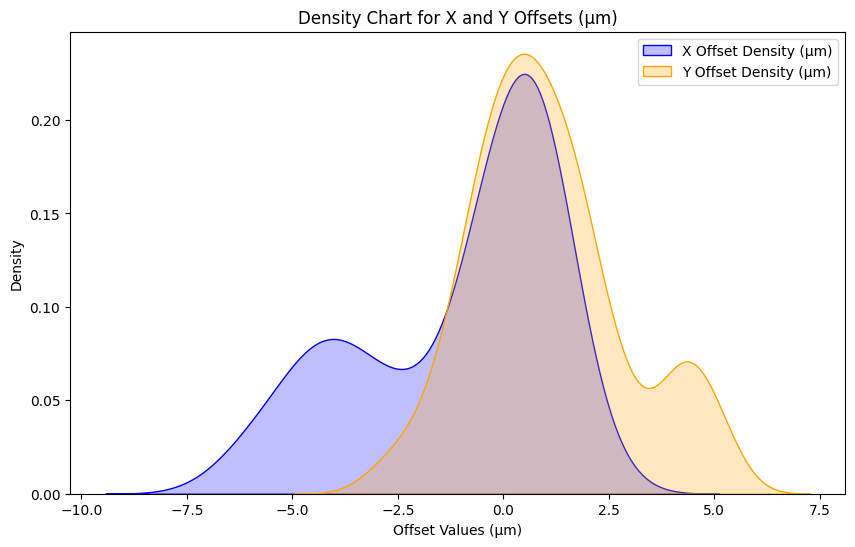

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Density plot for X and Y Offsets
plt.figure(figsize=(10, 6))
sns.kdeplot(df['x_offset'], shade=True, color='blue', label='X Offset Density (µm)')
sns.kdeplot(df['y_offset'], shade=True, color='orange', label='Y Offset Density (µm)')
plt.title('Density Chart for X and Y Offsets (µm)')
plt.xlabel('Offset Values (µm)')
plt.ylabel('Density')
plt.legend()
plt.show()


# **Step 4: Create a Box Plot**
**Create a box plot for X and Y offsets in micrometers.**

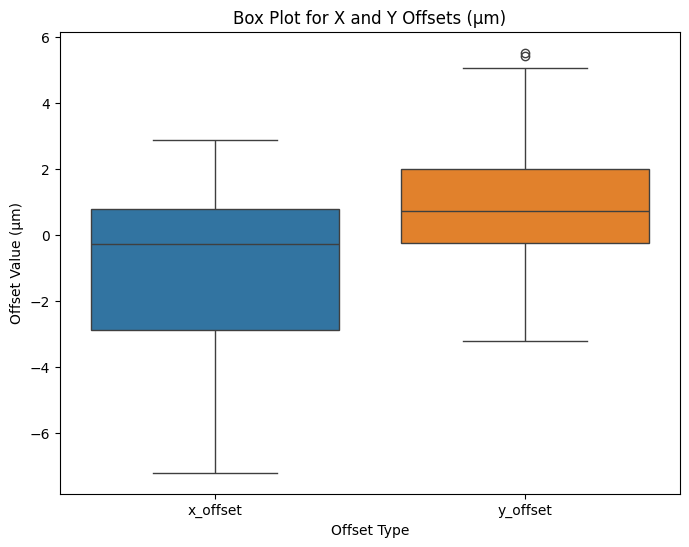

In [ ]:
# Box plot for X and Y offsets
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[['x_offset', 'y_offset']])
plt.title('Box Plot for X and Y Offsets (µm)')
plt.xlabel('Offset Type')
plt.ylabel('Offset Value (µm)')
plt.show()


# **Step 5: Create a Control Chart**
**Create a control chart for X and Y offsets, with control limits.**

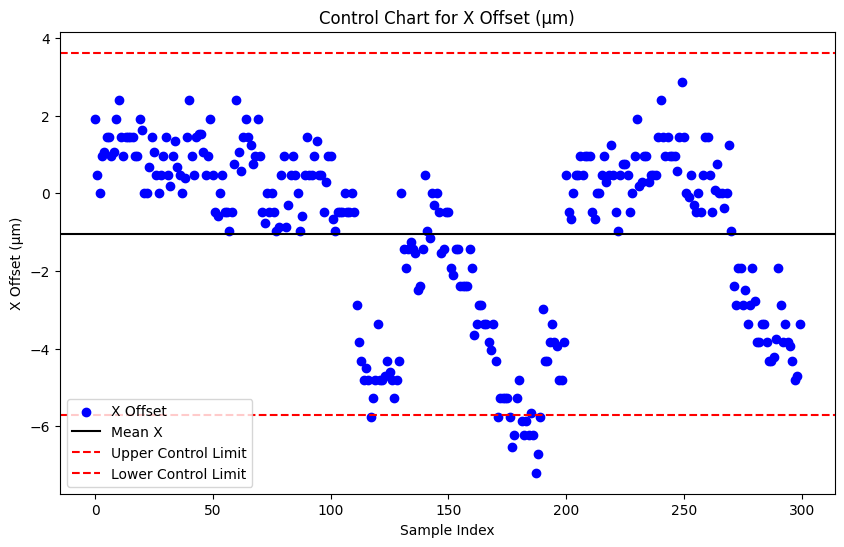

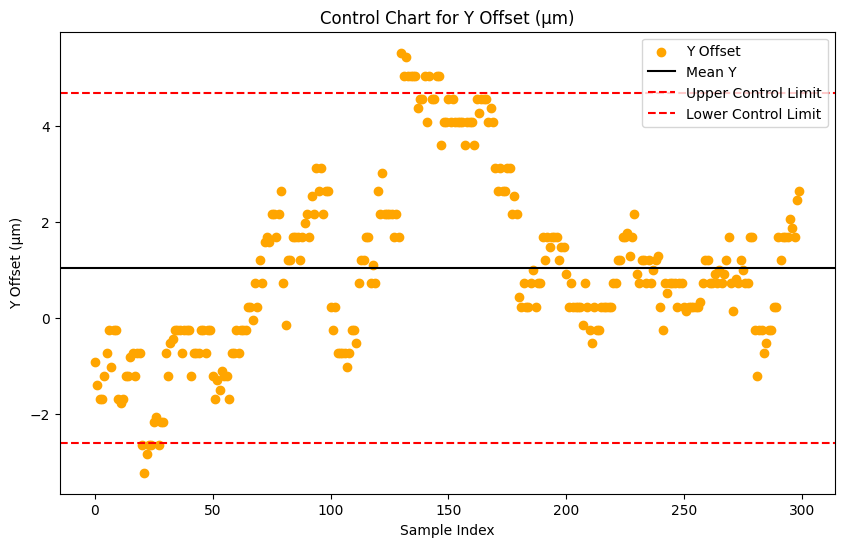

In [ ]:
# Calculate control limits for X and Y offsets
mean_x = df['x_offset'].mean()
std_x = df['x_offset'].std()
ucl_x = mean_x + 2 * std_x
lcl_x = mean_x - 2 * std_x

mean_y = df['y_offset'].mean()
std_y = df['y_offset'].std()
ucl_y = mean_y + 2 * std_y
lcl_y = mean_y - 2 * std_y

# Plot control charts for X Offset
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['x_offset'], color='blue', label='X Offset')
plt.axhline(mean_x, color='black', linestyle='-', label='Mean X')
plt.axhline(ucl_x, color='red', linestyle='--', label='Upper Control Limit')
plt.axhline(lcl_x, color='red', linestyle='--', label='Lower Control Limit')
plt.title('Control Chart for X Offset (µm)')
plt.xlabel('Sample Index')
plt.ylabel('X Offset (µm)')
plt.legend()
plt.show()

# Plot control charts for Y Offset
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['y_offset'], color='orange', label='Y Offset')
plt.axhline(mean_y, color='black', linestyle='-', label='Mean Y')
plt.axhline(ucl_y, color='red', linestyle='--', label='Upper Control Limit')
plt.axhline(lcl_y, color='red', linestyle='--', label='Lower Control Limit')
plt.title('Control Chart for Y Offset (µm)')
plt.xlabel('Sample Index')
plt.ylabel('Y Offset (µm)')
plt.legend()
plt.show()


# **Step 6: Center Offset Visualization with Tolerance (Micrometers)**
**Visualize center offset with a tolerance circle, ensuring the scale is in micrometers.**

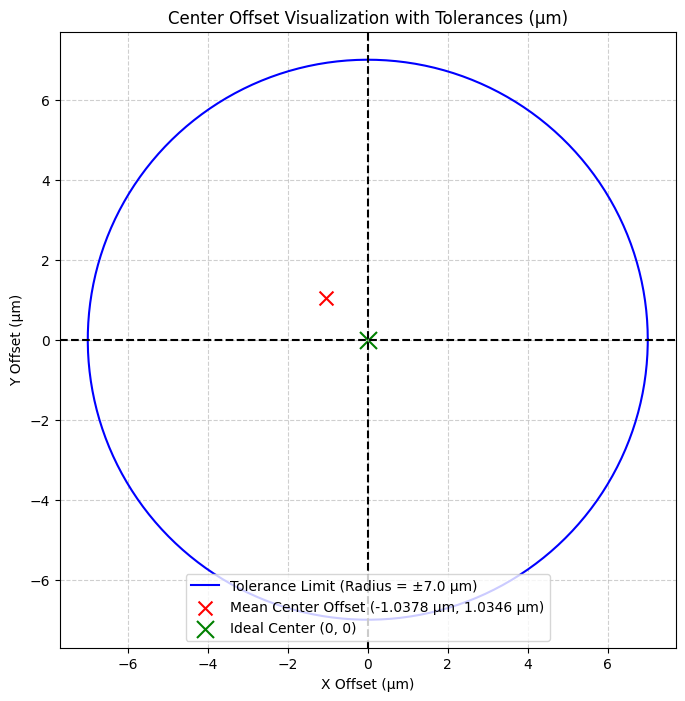

In [ ]:
import numpy as np

# Define the tolerance radius in micrometers (µm)
tolerance_radius_um = 7.0  # Example tolerance in micrometers (1.5 mm)

# Create data points for the circle representing the tolerance limit
theta = np.linspace(0, 2 * np.pi, 360)
circle_x_um = tolerance_radius_um * np.cos(theta)
circle_y_um = tolerance_radius_um * np.sin(theta)

# Plot the tolerance circle and mean center offset
plt.figure(figsize=(8, 8))

plt.plot(circle_x_um, circle_y_um, color='blue', label=f'Tolerance Limit (Radius = ±{tolerance_radius_um} µm)')
plt.scatter(mean_x, mean_y, color='red', marker='x', s=100, label=f'Mean Center Offset ({mean_x:.4f} µm, {mean_y:.4f} µm)')
plt.scatter(0, 0, color='green', marker='x', s=150, label='Ideal Center (0, 0)')
plt.axhline(0, color='black', linestyle='--')
plt.axvline(0, color='black', linestyle='--')
plt.title("Center Offset Visualization with Tolerances (µm)")
plt.xlabel("X Offset (µm)")
plt.ylabel("Y Offset (µm)")
plt.legend(loc='lower center')
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


# **Step 7: Normal Distribution Curve for X Offset**
**Create a normal distribution curve for X Offset in micrometers.**

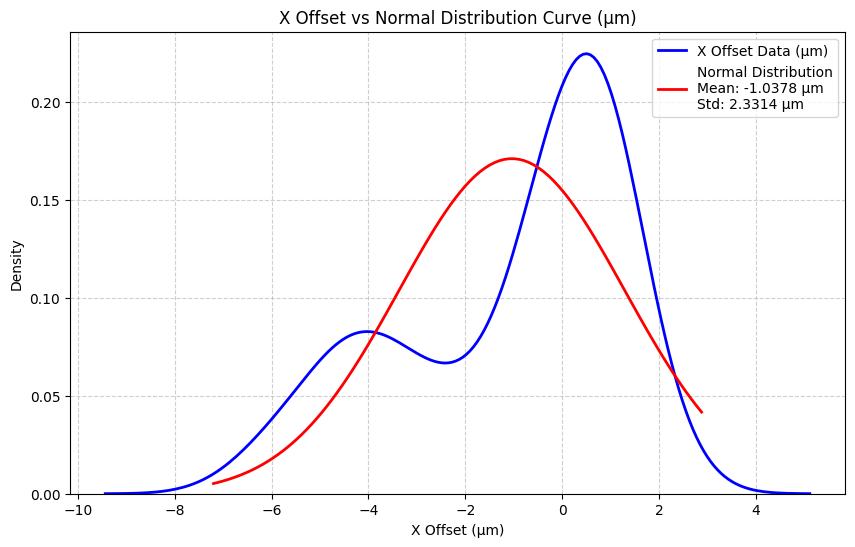

In [ ]:
from scipy.stats import norm

x_values = np.linspace(min(df['x_offset']), max(df['x_offset']), 100)
normal_dist_x = norm.pdf(x_values, mean_x, std_x)

plt.figure(figsize=(10, 6))
sns.kdeplot(df['x_offset'], color='blue', label='X Offset Data (µm)', lw=2)
plt.plot(x_values, normal_dist_x, color='red', label=f'Normal Distribution\nMean: {mean_x:.4f} µm\nStd: {std_x:.4f} µm', lw=2)
plt.title('X Offset vs Normal Distribution Curve (µm)')
plt.xlabel('X Offset (µm)')
plt.ylabel('Density')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


# **Step 8: Normal Distribution Curve for Y Offset**
**Create a normal distribution curve for Y Offset in micrometers.**

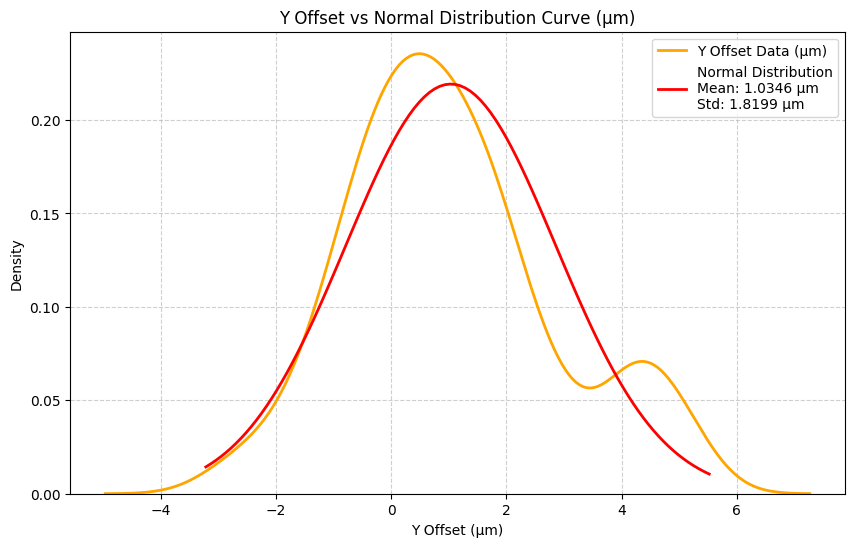

In [ ]:
y_values = np.linspace(min(df['y_offset']), max(df['y_offset']), 100)
normal_dist_y = norm.pdf(y_values, mean_y, std_y)

plt.figure(figsize=(10, 6))
sns.kdeplot(df['y_offset'], color='orange', label='Y Offset Data (µm)', lw=2)
plt.plot(y_values, normal_dist_y, color='red', label=f'Normal Distribution\nMean: {mean_y:.4f} µm\nStd: {std_y:.4f} µm', lw=2)
plt.title('Y Offset vs Normal Distribution Curve (µm)')
plt.xlabel('Y Offset (µm)')
plt.ylabel('Density')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


# **Step 9: Normal Distribution Curve for Center Offset**
**Create a normal distribution curve for Center Offset in micrometers.**

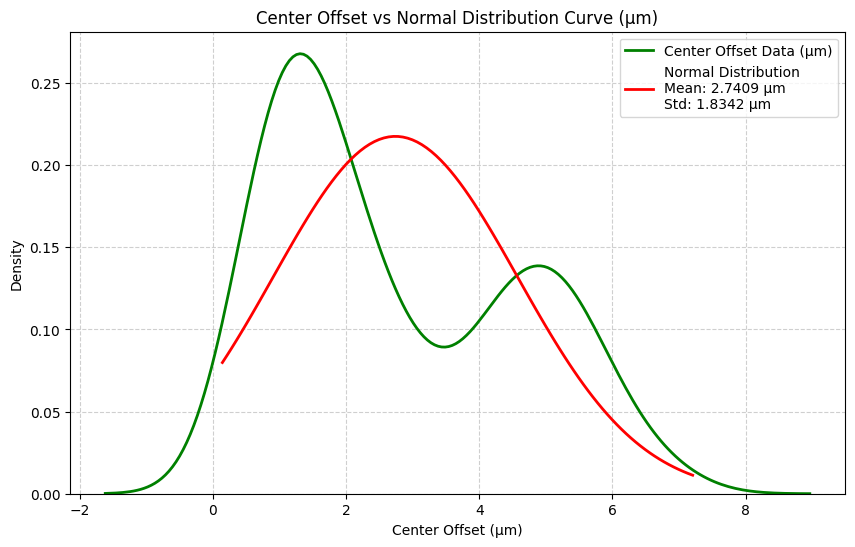

In [ ]:
mean_c = df['c_offset'].mean()
std_c = df['c_offset'].std()
c_values = np.linspace(min(df['c_offset']), max(df['c_offset']), 100)
normal_dist_c = norm.pdf(c_values, mean_c, std_c)

plt.figure(figsize=(10, 6))
sns.kdeplot(df['c_offset'], color='green', label='Center Offset Data (µm)', lw=2)
plt.plot(c_values, normal_dist_c, color='red', label=f'Normal Distribution\nMean: {mean_c:.4f} µm\nStd: {std_c:.4f} µm', lw=2)
plt.title('Center Offset vs Normal Distribution Curve (µm)')
plt.xlabel('Center Offset (µm)')
plt.ylabel('Density')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


# **Step 10: A Dashboard for X Offset Charts**
**This code creates a dashboard combining a density chart, box plot, control chart, and normal distribution curve for the X offset.**

<ipython-input-23-7271c499083f>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['x_offset'], shade=True, color='blue', ax=axes[0, 0])


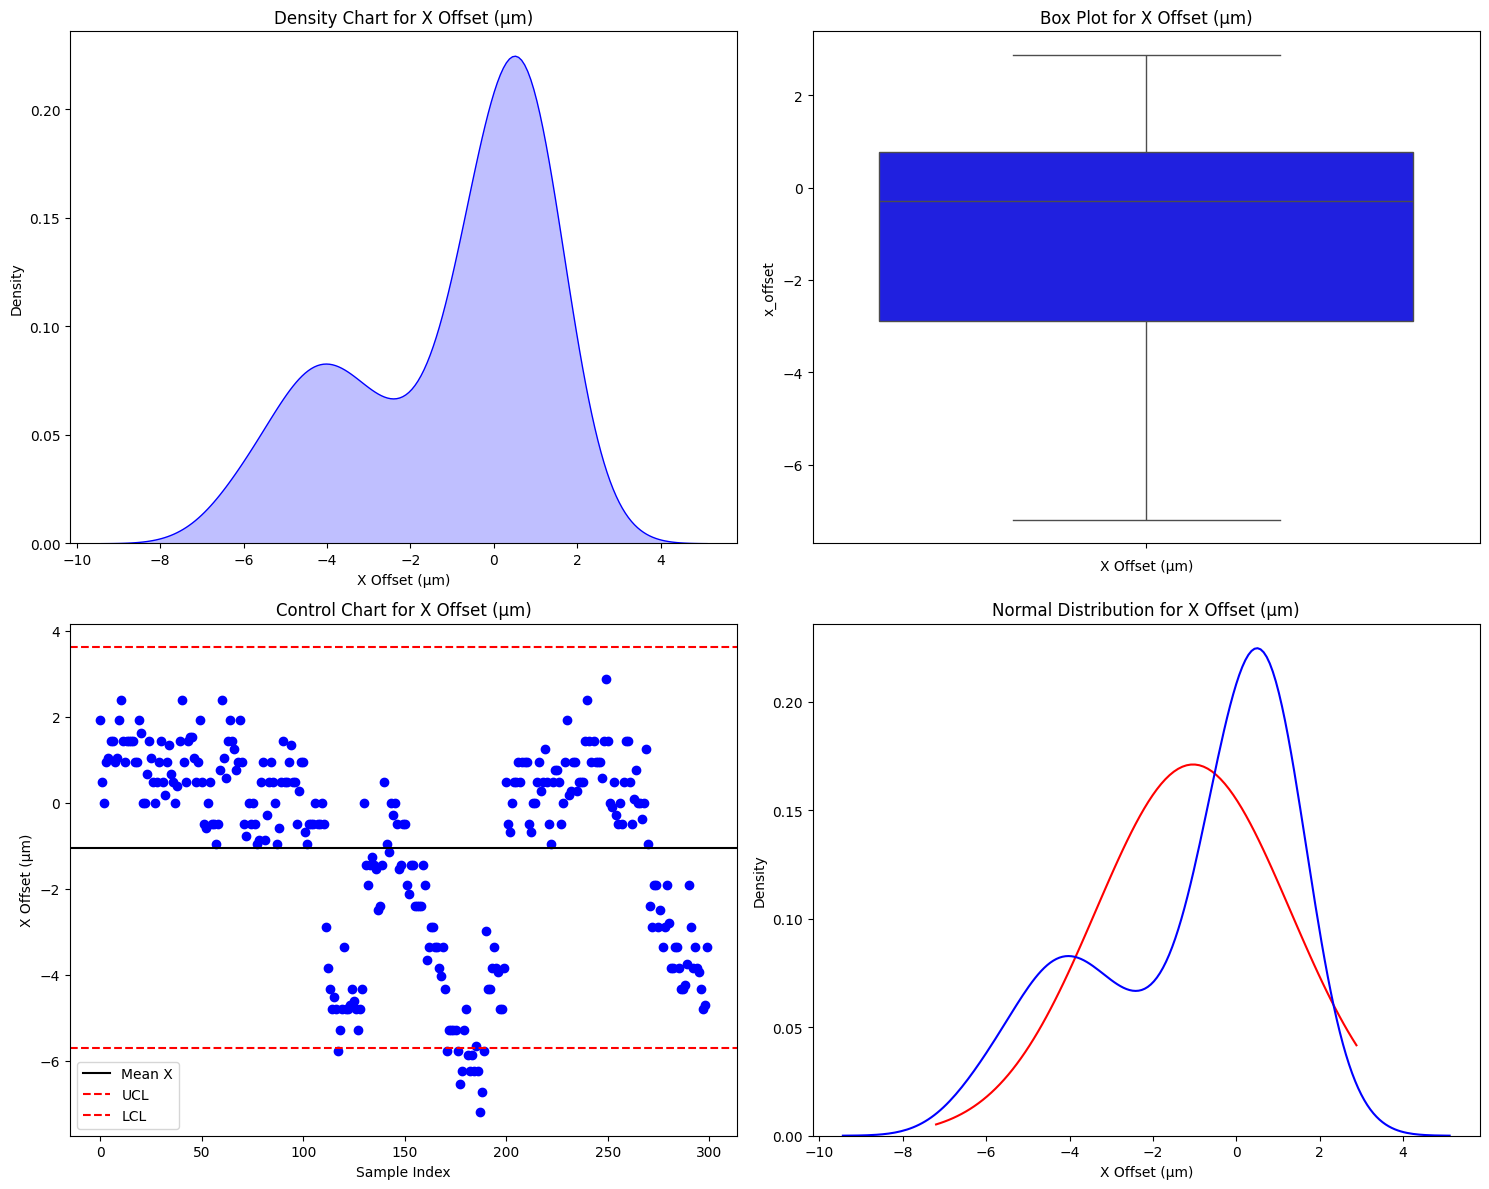

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Density plot for X Offset
sns.kdeplot(df['x_offset'], shade=True, color='blue', ax=axes[0, 0])
axes[0, 0].set_title('Density Chart for X Offset (µm)')
axes[0, 0].set_xlabel('X Offset (µm)')

# Box plot for X Offset
sns.boxplot(df['x_offset'], ax=axes[0, 1], color='blue')
axes[0, 1].set_title('Box Plot for X Offset (µm)')
axes[0, 1].set_xlabel('X Offset (µm)')

# Control chart for X Offset
axes[1, 0].scatter(df.index, df['x_offset'], color='blue')
axes[1, 0].axhline(mean_x, color='black', linestyle='-', label='Mean X')
axes[1, 0].axhline(ucl_x, color='red', linestyle='--', label='UCL')
axes[1, 0].axhline(lcl_x, color='red', linestyle='--', label='LCL')
axes[1, 0].set_title('Control Chart for X Offset (µm)')
axes[1, 0].set_xlabel('Sample Index')
axes[1, 0].set_ylabel('X Offset (µm)')
axes[1, 0].legend()

# Normal distribution curve for X Offset
axes[1, 1].plot(x_values, normal_dist_x, color='red', label='Normal Distribution')
sns.kdeplot(df['x_offset'], color='blue', ax=axes[1, 1])
axes[1, 1].set_title('Normal Distribution for X Offset (µm)')
axes[1, 1].set_xlabel('X Offset (µm)')

plt.tight_layout()
plt.show()


# **Step 11: A Dashboard for Y Offset Charts**
**Similarly, you can create a dashboard for Y Offset charts.**

<ipython-input-24-b3be1cb0ccc5>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['y_offset'], shade=True, color='orange', ax=axes[0, 0])


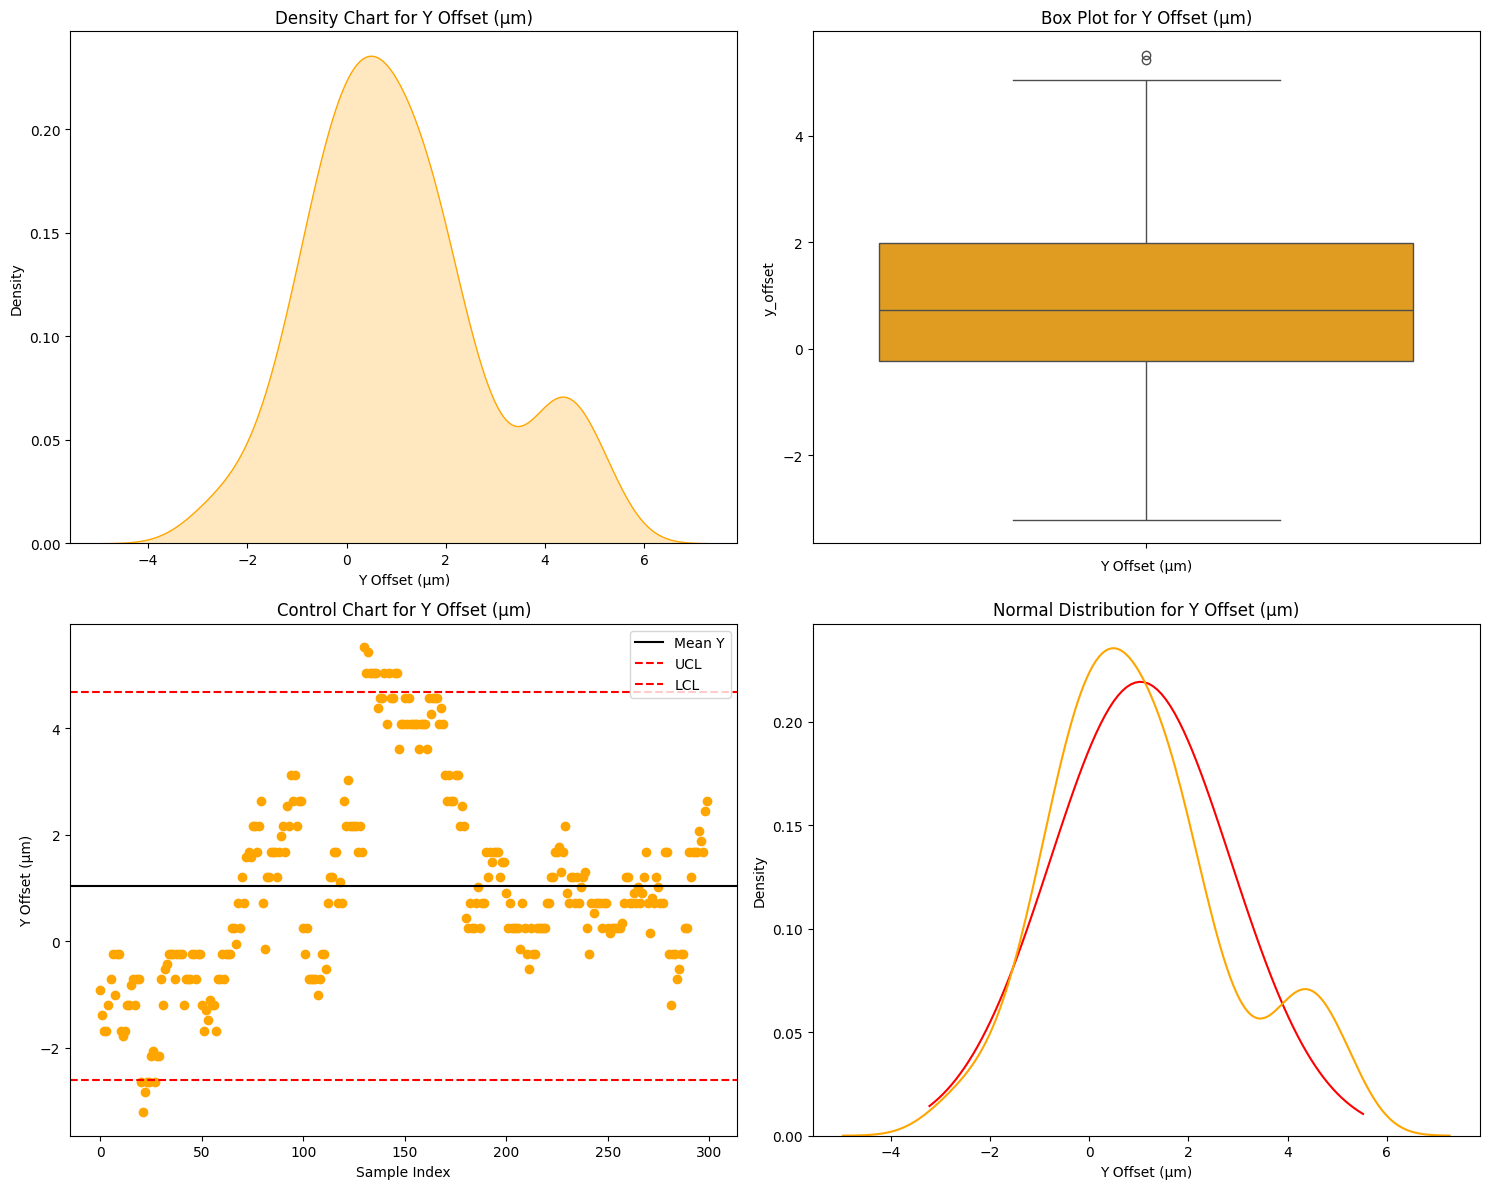

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Density plot for Y Offset
sns.kdeplot(df['y_offset'], shade=True, color='orange', ax=axes[0, 0])
axes[0, 0].set_title('Density Chart for Y Offset (µm)')
axes[0, 0].set_xlabel('Y Offset (µm)')

# Box plot for Y Offset
sns.boxplot(df['y_offset'], ax=axes[0, 1], color='orange')
axes[0, 1].set_title('Box Plot for Y Offset (µm)')
axes[0, 1].set_xlabel('Y Offset (µm)')

# Control chart for Y Offset
axes[1, 0].scatter(df.index, df['y_offset'], color='orange')
axes[1, 0].axhline(mean_y, color='black', linestyle='-', label='Mean Y')
axes[1, 0].axhline(ucl_y, color='red', linestyle='--', label='UCL')
axes[1, 0].axhline(lcl_y, color='red', linestyle='--', label='LCL')
axes[1, 0].set_title('Control Chart for Y Offset (µm)')
axes[1, 0].set_xlabel('Sample Index')
axes[1, 0].set_ylabel('Y Offset (µm)')
axes[1, 0].legend()

# Normal distribution curve for Y Offset
axes[1, 1].plot(y_values, normal_dist_y, color='red', label='Normal Distribution')
sns.kdeplot(df['y_offset'], color='orange', ax=axes[1, 1])
axes[1, 1].set_title('Normal Distribution for Y Offset (µm)')
axes[1, 1].set_xlabel('Y Offset (µm)')

plt.tight_layout()
plt.show()


# **Step 12: A Dashboard for Center Offset Charts**
**Now for the Center Offset charts dashboard.**

<ipython-input-25-bb1c640e2ed9>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['c_offset'], shade=True, color='green', ax=axes[0, 0])


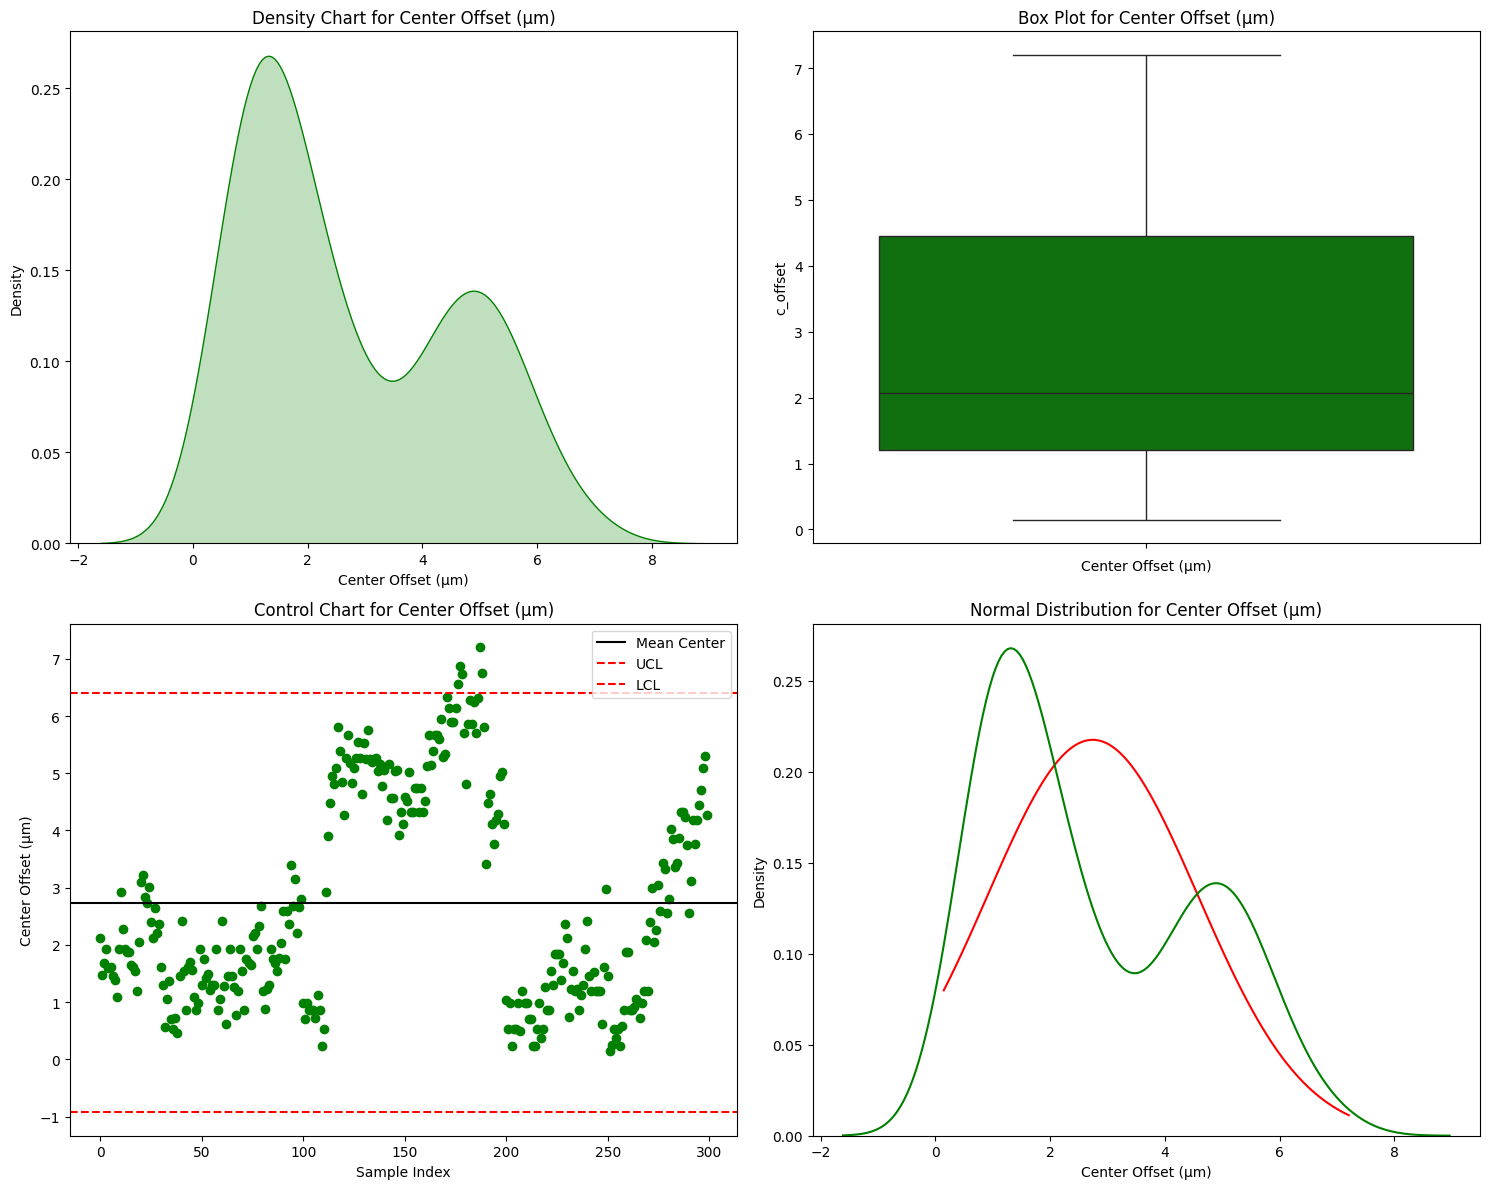

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Density plot for Center Offset
sns.kdeplot(df['c_offset'], shade=True, color='green', ax=axes[0, 0])
axes[0, 0].set_title('Density Chart for Center Offset (µm)')
axes[0, 0].set_xlabel('Center Offset (µm)')

# Box plot for Center Offset
sns.boxplot(df['c_offset'], ax=axes[0, 1], color='green')
axes[0, 1].set_title('Box Plot for Center Offset (µm)')
axes[0, 1].set_xlabel('Center Offset (µm)')

# Control chart for Center Offset (Calculate if needed)
mean_c = df['c_offset'].mean()
std_c = df['c_offset'].std()
ucl_c = mean_c + 2 * std_c
lcl_c = mean_c - 2 * std_c

axes[1, 0].scatter(df.index, df['c_offset'], color='green')
axes[1, 0].axhline(mean_c, color='black', linestyle='-', label='Mean Center')
axes[1, 0].axhline(ucl_c, color='red', linestyle='--', label='UCL')
axes[1, 0].axhline(lcl_c, color='red', linestyle='--', label='LCL')
axes[1, 0].set_title('Control Chart for Center Offset (µm)')
axes[1, 0].set_xlabel('Sample Index')
axes[1, 0].set_ylabel('Center Offset (µm)')
axes[1, 0].legend()

# Normal distribution curve for Center Offset
c_values = np.linspace(min(df['c_offset']), max(df['c_offset']), 100)
normal_dist_c = norm.pdf(c_values, mean_c, std_c)
axes[1, 1].plot(c_values, normal_dist_c, color='red', label='Normal Distribution')
sns.kdeplot(df['c_offset'], color='green', ax=axes[1, 1])
axes[1, 1].set_title('Normal Distribution for Center Offset (µm)')
axes[1, 1].set_xlabel('Center Offset (µm)')

plt.tight_layout()
plt.show()
